In [33]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

<h1>3.1 Loading Dataset</h1>

In [34]:

dataset = pd.read_csv('http://cs.joensuu.fi/sipu/datasets/dim032.txt',sep='   ',header=None)
dataset

/usr/local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,84,152,100,52,95,186,169,106,37,186,...,190,65,214,116,75,55,123,65,154,177
1,86,149,101,56,93,181,171,116,37,192,...,191,79,215,116,76,60,130,71,151,181
2,83,149,99,51,96,187,169,108,34,191,...,190,65,213,118,73,55,125,63,155,178
3,86,142,101,64,105,183,172,116,49,180,...,186,69,209,120,68,56,123,67,144,181
4,89,145,108,54,91,180,175,107,35,192,...,188,67,212,118,91,50,135,58,147,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,105,53,168,77,187,142,155,181,128,62,...,197,193,114,102,58,78,80,132,97,75
1020,104,53,169,77,187,142,155,182,128,63,...,196,192,113,102,58,78,80,132,97,75
1021,101,52,171,78,190,141,153,180,130,63,...,194,191,114,102,57,78,83,132,98,73
1022,106,59,165,74,186,143,151,180,125,66,...,195,193,115,102,55,76,81,131,98,73


<h1>3.2 Finding Optimal K for K-mean</h1>

In [35]:
sse=[]
for k in range(1,33):
    kmeans = KMeans(n_clusters=k, random_state=100,init='random').fit(np.array(dataset))
    sse.append(kmeans.inertia_)


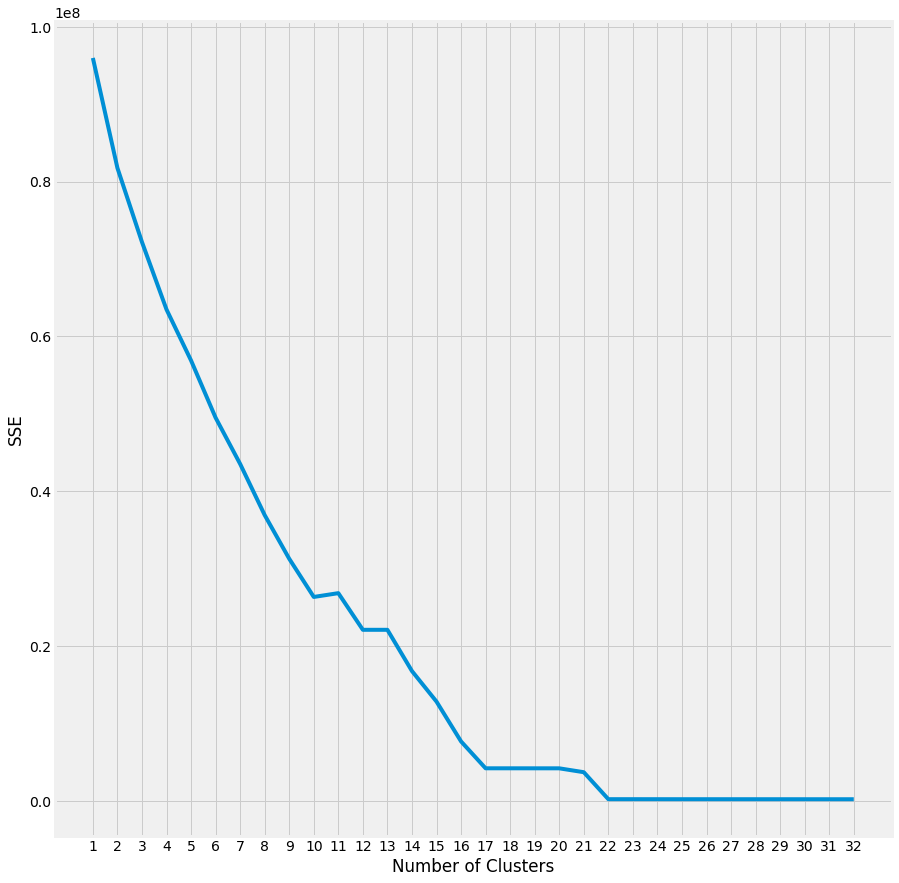

In [21]:
plt.figure(figsize=(15, 15))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 33), sse)
plt.xticks(range(1, 33))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

<h1>K-mean clustering using the optimal K=21</h1>

In [36]:
kmeans = KMeans(n_clusters=22).fit(np.array(dataset))

<h3>Cluster Center</h3>

In [37]:
array_of_centers=np.array(kmeans.cluster_centers_)
pd.DataFrame(kmeans.cluster_centers_)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,118.000000,68.000000,167.000000,59.000000,191.000000,101.000000,87.000000,62.000000,65.000000,47.000000,...,61.000000,204.000000,86.000000,208.000000,153.000000,155.000000,178.000000,111.000000,49.000000,196.000000
1,86.000000,55.000000,83.000000,174.000000,39.000000,151.000000,205.000000,83.000000,68.000000,43.000000,...,62.000000,208.000000,178.000000,105.000000,65.000000,146.000000,170.000000,224.000000,123.000000,150.000000
2,120.500000,141.000000,49.500000,168.000000,108.500000,56.500000,70.000000,196.000000,62.000000,210.500000,...,114.000000,218.500000,70.500000,211.000000,137.500000,43.000000,162.500000,93.000000,58.000000,90.500000
3,104.609375,53.140625,168.375000,77.109375,187.406250,142.625000,154.453125,181.296875,128.250000,63.140625,...,195.765625,192.296875,113.781250,102.250000,57.906250,77.640625,80.109375,132.281250,97.171875,74.968750
4,144.578125,203.421875,63.328125,87.000000,181.859375,84.515625,155.156250,206.765625,159.109375,178.312500,...,109.671875,173.812500,160.437500,101.093750,83.281250,196.937500,92.671875,216.812500,128.562500,213.250000
5,91.666667,61.000000,42.666667,78.333333,169.333333,104.000000,56.666667,224.000000,149.666667,159.333333,...,40.666667,189.000000,183.000000,191.333333,159.666667,213.333333,57.333333,123.666667,64.333333,99.666667
6,84.968254,151.253968,100.015873,51.936508,96.206349,184.365079,169.365079,107.857143,35.984127,186.555556,...,188.126984,66.238095,213.666667,115.968254,75.095238,55.095238,124.634921,64.301587,153.190476,176.730159
7,152.890625,105.656250,171.953125,118.671875,202.859375,131.609375,158.812500,58.562500,121.390625,99.390625,...,215.875000,45.687500,60.500000,65.875000,52.906250,181.156250,53.890625,56.609375,67.546875,72.734375
8,141.171875,206.156250,76.109375,150.750000,181.937500,148.453125,159.656250,88.375000,76.703125,119.656250,...,204.171875,155.437500,180.500000,50.609375,32.671875,198.421875,68.375000,197.656250,69.062500,119.171875
9,73.406250,213.312500,76.078125,166.140625,152.062500,116.093750,163.375000,179.953125,144.015625,218.046875,...,50.203125,58.453125,181.296875,198.359375,114.515625,141.656250,204.234375,207.671875,107.328125,86.140625


<h3>Euclidean Distance between each clusters</h3>

In [44]:
dist=euclidean_distances(kmeans.cluster_centers_)
pd.DataFrame(dist)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,447.957587,426.135248,424.980104,451.514140,466.113124,484.252266,476.852291,479.651208,487.480215,...,354.400758,463.572380,449.590718,435.392143,439.286497,422.613503,463.295770,27.215368,501.165641,544.404276
1,447.957587,0.000000,454.505501,362.489432,459.702267,460.738658,391.202707,525.933083,450.856234,441.615738,...,337.442852,420.281239,331.910711,462.086104,36.593754,449.309483,458.487091,447.960149,407.400295,419.933539
2,426.135248,454.505501,0.000000,440.755968,460.602665,422.885754,393.252089,468.335081,484.554547,386.722434,...,480.254106,432.486118,484.305642,301.473681,453.398004,20.765282,424.197380,422.242038,407.120682,454.138186
3,424.980104,362.489432,440.755968,0.000000,462.368631,408.772797,388.099630,421.633377,400.394274,487.029456,...,389.772229,424.378319,364.658187,424.433351,350.879697,433.509513,405.872109,421.715235,395.436738,347.019246
4,451.514140,459.702267,460.602665,462.368631,0.000000,414.336247,480.187259,469.138194,370.315919,404.744855,...,437.497122,338.928607,539.519525,387.830333,464.433675,456.470093,414.996290,452.054922,487.127665,542.128717
5,466.113124,460.738658,422.885754,408.772797,414.336247,0.000000,469.621989,535.547296,435.182058,451.387362,...,400.347216,433.770033,532.111006,455.145457,458.586380,419.096165,14.660069,464.890935,475.819760,538.684327
6,484.252266,391.202707,393.252089,388.099630,480.187259,469.621989,0.000000,425.984432,428.490217,421.397645,...,455.249482,468.637540,391.936239,387.573937,393.574704,387.552389,467.567127,484.262340,55.774941,372.166374
7,476.852291,525.933083,468.335081,421.633377,469.138194,535.547296,425.984432,0.000000,421.152008,488.870018,...,505.566644,445.160445,446.924732,415.076417,524.440230,461.489581,533.578555,475.712394,442.653908,460.206328
8,479.651208,450.856234,484.554547,400.394274,370.315919,435.182058,428.490217,421.152008,0.000000,501.710634,...,392.551445,480.894432,455.854362,412.984747,449.560817,479.156655,435.558962,479.968330,426.499084,482.204868
9,487.480215,441.615738,386.722434,487.029456,404.744855,451.387362,421.397645,488.870018,501.710634,0.000000,...,516.502739,425.563042,480.131593,385.812030,451.501636,384.539092,447.466296,484.900166,435.987913,517.998549


In [45]:
label=list(range(22))
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

<h1>3.3 Function to merge the clusters base on the Min/Max distance (Agglomerative Clustering)</h1>

In [46]:
from iteration_utilities import deepflatten


def find(element, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == element:
                return (i, j)


def h_fun(array,labels,min_max):
    

    for t in range(len(array)-1):
        l=len(array)
        flat=list(set(deepflatten(array)))[1]
        arr=np.tril(array)
        row,col=np.where(arr==flat)
        if(len(row)==0 and len(col)==0):
            row,col=find(flat,array)
            max_cor=int(max(row,col))
            min_cord=int(min(row,col))
        else:
            max_cor=int(max(row,col))
            min_cord=int(min(row,col))

        new_matrix=[]
        for i in range(l):
            new_array=[]
            if(i!=min_cord):
                if(i!=max_cor):
                    for j in range(l):
                        if(j!=max_cor):
                            if(j==min_cord):
                                new_array.append(min(array[i][j],array[i][max_cor]) if min_max == 'single' else max(array[i][j],array[i][max_cor]))
                            else:
                                new_array.append(array[i][j])
            else:
                for k in range(l):
                    if(k!=max_cor):
                        if(k==min_cord):
                            new_array.append(min(array[k][min_cord],array[k][min_cord]) if min_max == 'single' else max(array[k][min_cord],array[k][min_cord]) )  
                        else:
                            new_array.append(min(array[min_cord][k],array[max_cor][k]) if min_max == 'single' else max(array[min_cord][k],array[max_cor][k]))
            if(len(new_array)!=0):
                new_matrix.append(new_array)


        array=new_matrix
        labels[min_cord]=(str(labels[min_cord])+str(labels[max_cor]))
        labels.pop(max_cor)
        print(labels)



<h2>Using the Agglomerative Clustering function</h2>
<h3>Function take array of euclidean distance, labels for each cluster, type of clustering (single linkage or complete linkage)</h3>

In [47]:
h_fun(np.array(dist),label,'single')

[0, 1, 2, 3, 4, 5, 6, 7, 8, '912', 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, '912', '1013', 11, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, '716', 8, '912', '1013', 11, 14, 15, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, '518', 6, '716', 8, '912', '1013', 11, 14, 15, 17, 19, 20, 21]
[0, 1, 2, 3, 4, '51814', 6, '716', 8, '912', '1013', 11, 15, 17, 19, 20, 21]
[0, 1, 2, 3, 4, '51814', 6, '716', 8, '912', '1013', '1121', 15, 17, 19, 20]
[0, 1, '217', 3, 4, '51814', 6, '716', 8, '912', '1013', '1121', 15, 19, 20]
['019', 1, '217', 3, 4, '51814', 6, '716', 8, '912', '1013', '1121', 15, 20]
['019', 1, '217', 3, '41121', '51814', 6, '716', 8, '912', '1013', 15, 20]
['019', '1716', '217', 3, '41121', '51814', 6, 8, '912', '1013', 15, 20]
['019', '1716', '217912', 3, '41121', '51814', 6, 8, '1013', 15, 20]
['019', '1716', '217912', 3, '41121', '51814', 6, 8, '101315', 20]
['019', '1716', '2179126', 3, '41121', '51814', 8, '101315', 20]
['019', '1716', '2179126', 

In [50]:
label=list(range(22))
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [51]:
h_fun(np.array(dist),label,'complete')

[0, 1, 2, 3, 4, 5, 6, 7, 8, '912', 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, '91221', 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, '9122111', 10, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, '716', 8, '9122111', 10, 13, 14, 15, 17, 18, 19, 20]
[0, '1716', 2, 3, 4, 5, 6, 8, '9122111', 10, 13, 14, 15, 17, 18, 19, 20]
[0, '1716', 2, 3, 4, '518', 6, 8, '9122111', 10, 13, 14, 15, 17, 19, 20]
[0, '1716', '217', 3, 4, '518', 6, 8, '9122111', 10, 13, 14, 15, 19, 20]
[0, '1716', '217', 3, 4, '51814', 6, 8, '9122111', 10, 13, 15, 19, 20]
[0, '171651814', '217', 3, 4, 6, 8, '9122111', 10, 13, 15, 19, 20]
[0, '1716518144', '217', 3, 6, 8, '9122111', 10, 13, 15, 19, 20]
[0, '1716518144', '217', 3, 6, 8, '9122111', 10, '1315', 19, 20]
[0, '1716518144', '217', '36', 8, '9122111', 10, '1315', 19, 20]
[0, '1716518144', '217', '3620', 8, '9122111', 10, '1315', 19]
['019', '1716518144', '217', '3620', 8, '9122111', 10, '1315']
['019', '1716518

<h1>3.4 Heirarchical Clustering Dendrograms (Min/Max/Avg)</h1>

<h3>Single Linkage Dendrogram</h3>

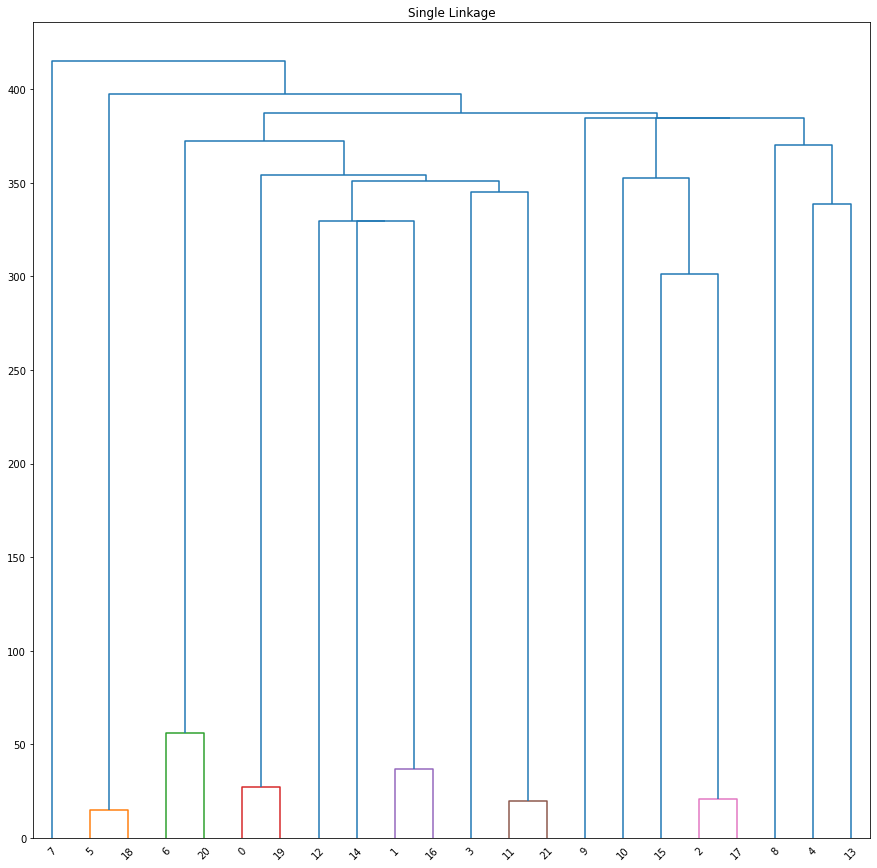

In [53]:
label=list(range(22))
plt.figure(figsize=(15, 15))
mat = np.array(dist)
dists = squareform(mat)
linkage_matrix = linkage(dists, "single")
pd.DataFrame(linkage_matrix)
dendrogram(linkage_matrix, labels=label)
plt.title("Single Linkage")
plt.show()

In [54]:
pd.DataFrame(linkage_matrix)

,0,1,2,3
0,5.0,18.0,14.660069,2.0
1,11.0,21.0,19.446363,2.0
2,2.0,17.0,20.765282,2.0
3,0.0,19.0,27.215368,2.0
4,1.0,16.0,36.593754,2.0
5,6.0,20.0,55.774941,2.0
6,15.0,24.0,301.473681,3.0
7,14.0,26.0,329.373626,3.0
8,12.0,29.0,329.897795,4.0
9,4.0,13.0,338.928607,2.0


<h3>Complete Linkage Dendrogram</h3>

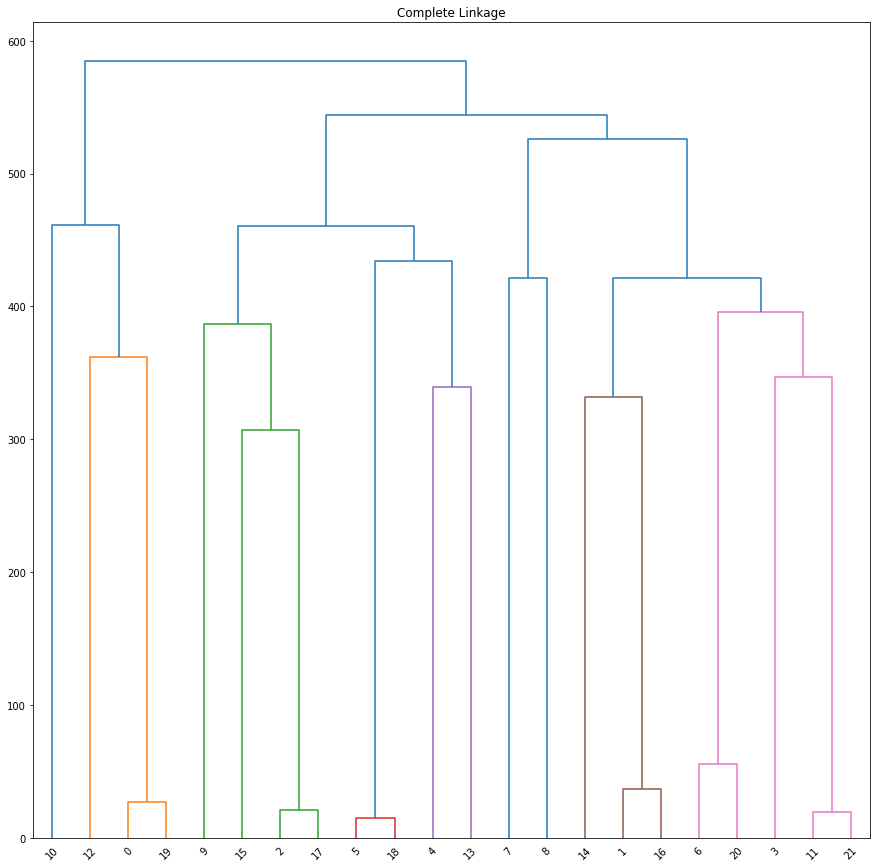

In [55]:
label=list(range(22))
plt.figure(figsize=(15, 15))
mat = np.array(dist)
dists = squareform(mat)
linkage_matrix = linkage(dists, "complete")
pd.DataFrame(linkage_matrix)
dendrogram(linkage_matrix, labels=label)
plt.title("Complete Linkage")
plt.show()

In [56]:
pd.DataFrame(linkage_matrix)

,0,1,2,3
0,5.0,18.0,14.660069,2.0
1,11.0,21.0,19.446363,2.0
2,2.0,17.0,20.765282,2.0
3,0.0,19.0,27.215368,2.0
4,1.0,16.0,36.593754,2.0
5,6.0,20.0,55.774941,2.0
6,15.0,24.0,306.656291,3.0
7,14.0,26.0,331.910711,3.0
8,4.0,13.0,338.928607,2.0
9,3.0,23.0,347.019246,3.0


<h3>Average Linkage Dendrogram</h3>

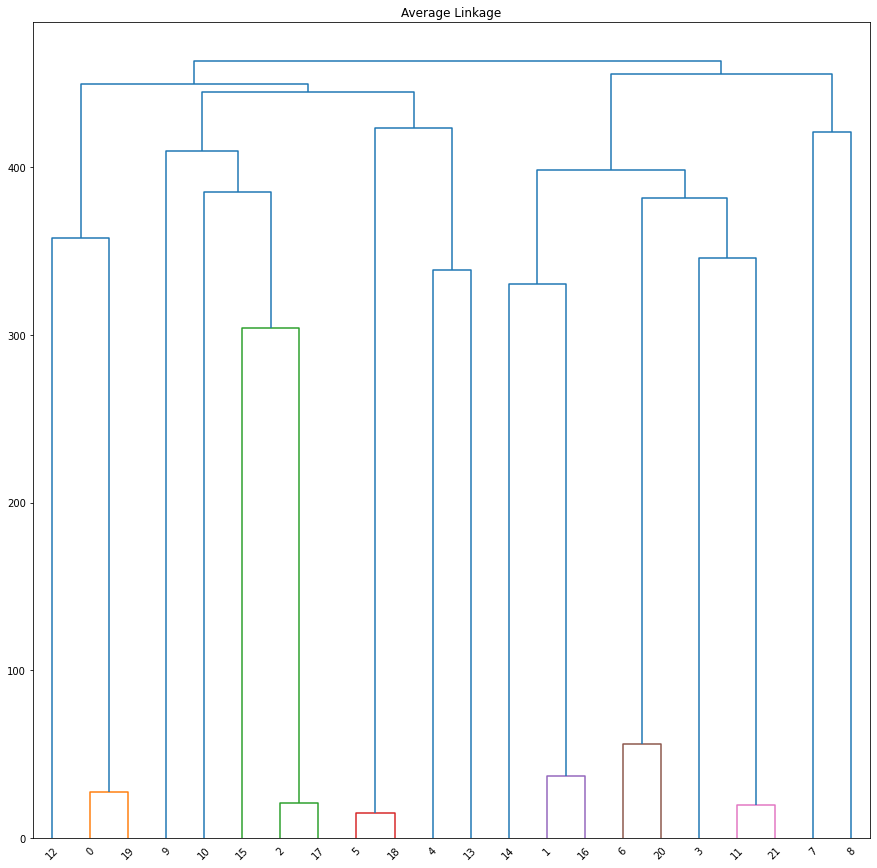

In [58]:
label=list(range(22))
plt.figure(figsize=(15, 15))
mat = np.array(dist)
dists = squareform(mat)
linkage_matrix = linkage(dists, "average")
pd.DataFrame(linkage_matrix)
dendrogram(linkage_matrix, labels=label)
plt.title("Average Linkage")
plt.show()

In [59]:
pd.DataFrame(linkage_matrix)

,0,1,2,3
0,5.0,18.0,14.660069,2.0
1,11.0,21.0,19.446363,2.0
2,2.0,17.0,20.765282,2.0
3,0.0,19.0,27.215368,2.0
4,1.0,16.0,36.593754,2.0
5,6.0,20.0,55.774941,2.0
6,15.0,24.0,304.064986,3.0
7,14.0,26.0,330.642168,3.0
8,4.0,13.0,338.928607,2.0
9,3.0,23.0,346.131429,3.0
